In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("./regLinPoli2.csv",header=0)
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,y
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.00000,1029.000000,1029.000000,1029.000000,...,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1.029000e+03
mean,-12.492680,327718.372035,2.565422,-0.018122,1.235180,-153.782162,-23648.95337,-2.565422,0.018122,-4.108330,...,5.612245,100.650146,-29.719145,-136.164237,-101.649174,-34.310010,-7.965986,-37.117590,2.499514,-8.035132e+18
std,572.608894,298395.344783,0.424105,0.715733,58.709228,0.000000,0.00000,0.424105,0.715733,584.648570,...,239.009325,2862.331915,4489.803784,2641.944700,5153.481524,2569.220416,2933.878621,1504.903744,102.994972,2.593868e+20
min,-992.795572,1.098476,0.020395,-0.999991,-100.000000,-153.782162,-23648.95337,-2.999260,-0.999992,-996.652132,...,-410.000000,-4857.000000,-7715.000000,-4596.000000,-8898.000000,-4383.000000,-5133.000000,-2565.000000,-175.000000,-9.506460e+20
25%,-499.000060,59791.243170,2.388319,-0.760277,-51.000000,-153.782162,-23648.95337,-2.869121,-0.714801,-511.919891,...,-189.000000,-2457.000000,-4063.000000,-2438.000000,-4780.000000,-2311.000000,-2520.000000,-1411.000000,-85.000000,-7.703790e+18
50%,-27.174576,241226.533900,2.691213,-0.029038,3.000000,-153.782162,-23648.95337,-2.691213,0.029038,-6.507760,...,7.000000,123.000000,129.000000,-196.000000,-13.000000,20.000000,-35.000000,78.000000,6.000000,-1.094503e+10
75%,477.216100,547320.664300,2.869121,0.714801,52.000000,-153.782162,-23648.95337,-2.388319,0.760277,516.046297,...,214.000000,2654.000000,3890.000000,2138.000000,4195.000000,2165.000000,2521.000000,1227.000000,94.000000,5.636450e+18
max,998.297367,996597.632200,2.999260,0.999992,100.000000,-153.782162,-23648.95337,-0.020395,0.999991,1000.933758,...,410.000000,4862.000000,7752.000000,4577.000000,8866.000000,4384.000000,5123.000000,2568.000000,175.000000,9.881420e+20


In [3]:
ds = df.as_matrix()

## Clase linearRegression

Escribí esta clase que implementa una regresión lineal con multiplicaciones matriciales, utiliza el método iterativo y regularización ridge. Con esta es mucho más fácil construir código para probar el funcionamiento de los hiperparámetros.

In [7]:
class linearRegression:
    """Class to implement a vectorized iterative linear regression with ridge regularization."""
    
    def __init__(self, eta=0.01, lmbd=0, iterations=1):
        self.ws = np.matrix([]) #empty matrix for the coefficients of our hyperplane
        self.eta=eta
        self.lmbd=lmbd
        self.iterations = iterations
    
    def add_x0(self,X):
        ones = np.asmatrix(np.ones(X.shape[0]))
        X_new = np.concatenate((ones.transpose(),X), axis = 1)
        return X_new
    
    def calcEstimation(self,X):
        v = X*self.ws.transpose()
        return v
    
    def iterate(self,X,Y):
        ws_new = np.asmatrix(np.zeros(self.ws.shape[1]))
        
        for it in range(self.iterations):
            for i in range(X.shape[0]):
                error = (Y[0,i] - self.calcEstimation(X[i]))

                ws_new[0,0] = (self.ws[0,0] + (self.eta*error[0,0]))
                for j in range(1,self.ws.shape[1]):
                    ws_new[0,j] = (self.ws[0,j] + (self.eta*error[0,0]*X[i,j]) - (self.lmbd*self.ws[0,j]))
            
                self.ws = ws_new #update the coefficients.
        
    
    def train(self,X, Y):
        #train the ws iteratively.
        X = self.add_x0(X) #Add the column of ones
        
        #Initialize the ws
        self.ws = np.asmatrix((np.random.rand(X.shape[1])*10) - 5)
        
        #iterate through the whole of x.
        self.iterate(X,Y)
        
        #we should be ready to predict
    
    
    def predict(self,X):
        #calculate the resulting matrix (vector) and return it.
        X = self.add_x0(X)
        
        return self.calcEstimation(X)
    
        

## Función crossVal

Esta función implementa K-fold cross validation con K folds, el dataset entero (del cual la función tomará la última columna como la variable *target*), el valor de lambda y además se le puede especificar si se quiere hacer shuffle del dataset para romper cualquier orden que exista en los datos para que cada fold sea más representativo.

In [15]:
#Funcion para hacer K-fold cross validation, shuffle will create a shuffled matrix to break any existing order.
#This version assumes the target variable is the last one.
def crossVal(k, dataset,lmbd = 0, shuffle=True):
    error = 0.0
    n = ds.shape[0] #Get the number of tuples
    
    divTup = n/k #Int division to get the number of tuples in a division
    
    #shuffle the dataset to make sure any previous order in the dataset is broken.
    if(shuffle == True):
        np.random.shuffle(dataset)
    
    #divide the dataset in k folds
    foldRanges = np.arange(0,(k+1)*divTup,divTup) # will produce [0,k*divTup] in steps of divTup
    
    
    for i in range(0,k):
        #Construct validation set
        #construct test set
        
        leftVal = foldRanges[i]
        rightVal = foldRanges[i+1]
        
        valSet = dataset[leftVal:rightVal,:]
        
        trainSet1 = dataset[0:leftVal,:]
        trainSet2 = dataset[rightVal:,:]
        
        #join to form the full test set
        trainSet = np.concatenate((trainSet1,trainSet2), axis=0)
        
        X_val = valSet[:,0:-1]
        Y_val = valSet[:,-1:]
        
        X_train = trainSet[:,0:-1]
        Y_train = trainSet[:,-1:]
        
        #a little scaling
        
        scaler = StandardScaler().fit(X_train)
        X_train=scaler.transform(X_train)
        X_val=scaler.transform(X_val)
        
        
        
        lr = linearRegression(iterations = 1, eta=0.01,lmbd=lmbd)
        lr.train(X_train, Y_train.transpose())
        Y_predicted = lr.predict(X_val)

        error += mean_squared_error(Y_val, Y_predicted)
        
        
    #Not sure if I would return an average of all the coefficients for the 'final' coefficient answer
    
    #meanwhile just return the error
    return error
        
        
    
    
    
    

Test it out!!!

In [21]:
density = 8
lambdaSpace = np.linspace(0,0.5,density)
error = []

for i in range(density):
    error.append(crossVal(10,ds,lmbd = lambdaSpace[i], shuffle = False))


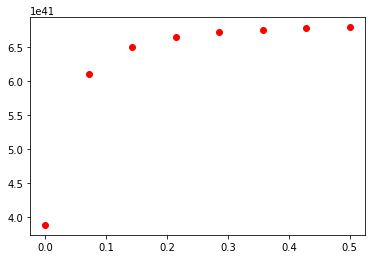

In [22]:
plt.plot(lambdaSpace, error, 'ro')
plt.show()

Como podemos observar, parece que tenemos el mismo efecto que en el último trabajo, es decir, que el valor óptimo de lambda es 0.

Probemos con un valor diferente para K:

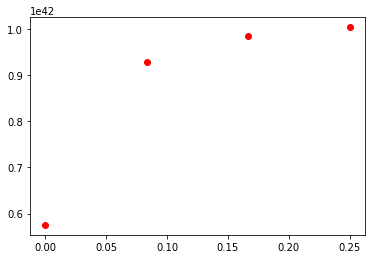

In [23]:
density = 4
lambdaSpace = np.linspace(0,0.25,density)
error = []

for i in range(density):
    error.append(crossVal(15,ds,lmbd = lambdaSpace[i], shuffle = False))
    
plt.plot(lambdaSpace, error, 'ro')
plt.show()

Y pues concluímos que para este caso también el lambda más óptimo es 0.